GAN networks testing CNN's genarative

DCGAN - Popular GAN. dicriminator and generator use
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

PGGAN - Used for training high resolution
https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/

SRGAN - A GAN used for Upscalling resolution of images
https://www.kaggle.com/code/minawagihsmikhael/srgan-image-super-resolution-pytorch


Tensor Totorial - https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

_____________________________________________________________

In [ ]:
!ls ../.kaggle/

 input	'kaggle (2).json'


In [ ]:
!mv ../.kaggle ../kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/food41")

print(f"Dataset downloaded to: {path}")

# List the contents of the downloaded directory
import os
print(os.listdir(path))

# Access a specific file within the dataset:
file_path = os.path.join(path, "images") # Replace with an actual file name

print(os.listdir(file_path))

file_list = os.listdir(file_path)
arr = [file_list[i:i + 10] for i in range(0, len(file_list), 10)]



for x in arr:

  print(f"\n  {x}  \n")
  for y in x:
      with open(y, 'r') as f:
        data = f.read()

Dataset downloaded to: /root/.cache/kagglehub/datasets/kmader/food41/versions/5
['food_test_c101_n1000_r128x128x1.h5', 'food_c101_n10099_r32x32x3.h5', 'images', 'food_c101_n10099_r32x32x1.h5', 'food_c101_n10099_r64x64x3.h5', 'food_test_c101_n1000_r64x64x1.h5', 'food_test_c101_n1000_r64x64x3.h5', 'food_test_c101_n1000_r32x32x3.h5', 'food_c101_n1000_r384x384x3.h5', 'food_test_c101_n1000_r32x32x1.h5', 'food_c101_n10099_r64x64x1.h5', 'food_test_c101_n1000_r128x128x3.h5', 'meta']
['omelette', 'chicken_quesadilla', 'lobster_roll_sandwich', 'pizza', 'spaghetti_bolognese', 'strawberry_shortcake', 'macaroni_and_cheese', 'french_fries', 'gyoza', 'chicken_wings', 'paella', 'ice_cream', 'guacamole', 'churros', 'panna_cotta', 'spring_rolls', 'bibimbap', 'mussels', 'gnocchi', 'spaghetti_carbonara', 'cheese_plate', 'baby_back_ribs', 'beet_salad', 'onion_rings', 'apple_pie', 'pancakes', 'samosa', 'edamame', 'hummus', 'pork_chop', 'caprese_salad', 'scallops', 'seaweed_salad', 'waffles', 'breakfast_burr

FileNotFoundError: [Errno 2] No such file or directory: 'omelette'

In [ ]:
!kaggle datasets download -d kmader/food41
!unzip food41.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open food41.zip, food41.zip.zip or food41.zip.ZIP.


Download the dataset first

In [ ]:
#Loading the data from the UCSD Large Dataset.
!kaggle datasets download -d mmazizi/ucsd-3-class-labeled-retinal-oct-images
!unzip ucsd-3-class-labeled-retinal-oct-images.zip

Dataset URL: https://www.kaggle.com/datasets/mmazizi/ucsd-3-class-labeled-retinal-oct-images
License(s): Attribution 4.0 International (CC BY 4.0)
^C
unzip:  cannot find or open ucsd-3-class-labeled-retinal-oct-images.zip, ucsd-3-class-labeled-retinal-oct-images.zip.zip or ucsd-3-class-labeled-retinal-oct-images.zip.ZIP.


In [ ]:
from google.colab import files
files.upload()  # Manually upload kaggle.json

{}

In [ ]:
!chmod 600 ../root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle


This is to check dataset size

In [ ]:
import os
from PIL import Image
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

def analyze_image_folder(folder_path):
    """Analyze a folder containing images and return statistics."""
    stats = {
        'total_images': 0,
        'total_size_bytes': 0,
        'formats': {},
        'dimensions': [],
        'file_sizes': [],
        'corrupted_files': []
    }

    # Walk through the directory
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_size = os.path.getsize(file_path)

            # Check if file is an image
            try:
                with Image.open(file_path) as img:
                    format = img.format.lower() if img.format else 'unknown'
                    width, height = img.size

                    # Update statistics
                    stats['total_images'] += 1
                    stats['total_size_bytes'] += file_size
                    stats['formats'][format] = stats['formats'].get(format, 0) + 1
                    stats['dimensions'].append((width, height))
                    stats['file_sizes'].append(file_size)
            except Exception as e:
                stats['corrupted_files'].append((file_path, str(e)))

    return stats

def format_size(size_bytes):
    """Convert bytes to human readable format."""
    for unit in ['B', 'KB', 'MB', 'GB']:
        if size_bytes < 1024:
            return f"{size_bytes:.2f} {unit}"
        size_bytes /= 1024
    return f"{size_bytes:.2f} TB"

def print_folder_stats(folder_path, stats):
    """Print formatted statistics for a folder."""
    print(f"\nAnalysis for folder: {folder_path}")
    print("-" * 50)
    print(f"Total images: {stats['total_images']}")
    print(f"Total folder size: {format_size(stats['total_size_bytes'])}")

    if stats['total_images'] > 0:
        print("\nImage formats:")
        for format, count in stats['formats'].items():
            print(f"  - {format}: {count} files")

        # Calculate average dimensions and size
        avg_width = sum(w for w, _ in stats['dimensions']) / len(stats['dimensions'])
        avg_height = sum(h for _, h in stats['dimensions']) / len(stats['dimensions'])
        avg_size = sum(stats['file_sizes']) / len(stats['file_sizes'])

        print(f"\nAverage image dimensions: {avg_width:.0f}x{avg_height:.0f}")
        print(f"Average file size: {format_size(avg_size)}")

        # Find dimension ranges
        min_dim = min((w * h) for w, h in stats['dimensions'])
        max_dim = max((w * h) for w, h in stats['dimensions'])
        print(f"Smallest image: {min_dim} pixels")
        print(f"Largest image: {max_dim} pixels")

    if stats['corrupted_files']:
        print("\nCorrupted or unreadable files:")
        for file_path, error in stats['corrupted_files']:
            print(f"  - {file_path}: {error}")

def main():
    # Get user input for folders to analyze
    print("Enter the paths of your image folders (one per line)")
    print("Press Enter twice when done:")

    folders = []
    while True:
        folder = input().strip()
        if not folder:
            break
        if os.path.exists(folder):
            folders.append(folder)
        else:
            print(f"Warning: Folder '{folder}' does not exist")

    # Analyze each folder
    for folder in folders:
        stats = analyze_image_folder(folder)
        print_folder_stats(folder, stats)

if __name__ == "__main__":
    main()

Enter the paths of your image folders (one per line)
Press Enter twice when done:
/content/OCTUCSD-3class/OCTUCSD-3class/OCT/train/CNV
/content/OCTUCSD-3class/OCTUCSD-3class/OCT/train/NORMAL
/content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusenFix/DRUSEN


Analysis for folder: /content/OCTUCSD-3class/OCTUCSD-3class/OCT/train/CNV
--------------------------------------------------
Total images: 37205
Total folder size: 2.49 GB

Image formats:
  - jpeg: 37205 files

Average image dimensions: 736x496
Average file size: 70.16 KB
Smallest image: 190464 pixels
Largest image: 761856 pixels

Analysis for folder: /content/OCTUCSD-3class/OCTUCSD-3class/OCT/train/NORMAL
--------------------------------------------------
Total images: 51140
Total folder size: 2.85 GB

Image formats:
  - jpeg: 51140 files

Average image dimensions: 693x496
Average file size: 58.52 KB
Smallest image: 190464 pixels
Largest image: 761856 pixels

Analysis for folder: /content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrus

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dyslexiainthebrain","key":"cfa7d8d0a3dd28a6a828470d8dc44e7c"}'}

Installation of dependencies & setup seed

In [ ]:
#%matplotlib inline
try:
  import argparse
except:
  print("Argparse not installed")
  print("Installing argparse . . .")
  !pip install argparse
  print("Installed argparse")

try:
  import os
except:
  print("OS not installed")
  print("Installing os . . .")
  !pip install os
  print("Installed os")

try:
  import random
except:
  print("Random not installed")
  print("Installing random . . .")
  !pip install random
  print("Installed random")

try:
  import torch
except:
  print("Torch not installed")
  print("Installing torch . . .")
  !pip install torch==1.13.1
  print("Installed torch")


try:
  import torch.nn as nn
except:
  print("Torch.nn not installed")
  print("Installing torch.nn . . .")
  !pip install torch.nn==1.13.1
  print("Installed torch.nn")

try:
  import torch.nn.parallel
except:
  print("Torch.nn.parallel not installed")
  print("Installing torch.nn.parallel . . .")
  !pip install torch.nn.parallel==1.13.1
  print("Installed torch.nn.parallel")

try:
  import torch.optim as optim
except:
  print("Torch.optim not installed")
  print("Installing torch.optim . . .")
  !pip install torch.optim==1.13.1
  print("Installed torch.optim")

try:
  import torch.utils.data
except:
  print("Torch.utils.data not installed")
  print("Installing torch.utils.data . . .")
  !pip install torch.utils.data==1.13.1
  print("Installed torch.utils.data")

try:
  import torchvision.datasets as dset
except:
  print("Torchvision.datasets not installed")
  print("Installing torchvision.datasets . . .")
  !pip install torchvision.datasets==0.14.1
  print("Installed torchvision.datasets")


try:
  import torchvision.transforms as transforms
except:
  print("Torchvision.transforms not installed")
  print("Installing torchvision.transforms . . .")
  !pip install torchvision.transforms==0.14.1
  print("Installed torchvision.transforms")

try:
  import torchvision.utils as vutils
except:
  print("Torchvision.utils not installed")
  print("Installing torchvision.utils . . .")
  !pip install torchvision.utils==0.14.1
  print("Installed torchvision.utils")

try:
  import numpy as np
except:
  print("Numpy not installed")
  print("Installing numpy . . .")
  !pip install numpy
  print("Installed numpy")

try:
  import matplotlib.pyplot as plt
except:
  print("Matplotlib not installed")
  print("Installing matplotlib . . .")
  !pip install matplotlib
  print("Installed matplotlib")

try:
  import matplotlib.animation as animation
except:
  print("Matplotlib.animation not installed")
  print("Installing matplotlib.animation . . .")
  !pip install matplotlib.animation
  print("Installed matplotlib.animation")

try:
  from IPython.display import HTML
except:
  print("IPython.display not installed")
  print("Installing IPython.display . . .")
  !pip install IPython.display
  print("Installed IPython.display")

try:
  from time import time
except:
  print("Time not installed")
  print("Installing time . . .")
  !pip install time
  print("Installed time")

try:
  import datetime
except:
  print("Datetime not installed")
  print("Installing datetime . . .")
  !pip install datetime
  print("Installed datetime")

try:
  import tqdm
except:
  print("tqdm not installed")
  print("Installing tqdm . . .")
  !pip install tqdm
  print("Installed tqdm")


try:
  import datetime
except:
  print("Datetime not installed")
  print("Installing datetime . . .")
  !pip install datetime
  print("Installed datetime")

try:
  import time
except:
  print("Time not installed")
  print("Installing time . . .")
  !pip install time
  print("Installed time")

try:
  import cv2
except:
  print("OpenCV not installed")
  print("Installing OpenCV . . .")
  !pip install opencv-python
  print("Installed OpenCV")


# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

Random Seed:  999


Setup data variable for DCGAN

In [ ]:
# Root directory for dataset
dataroot = "/content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusen"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 32

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 224

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
# Number of elements in the input vector
# Larger means generating more diverse data
# Larger also means higher cost to train
# Smaller vector means it is lower in cose
# But a lower vector also means less complex data output
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

This is to preprocess some images to get rid of white noise around the edges


In [ ]:



def preprocess_oct_image(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convert white pixels to black
    img[img == 255] = 0


    ## Random spin of the image
    angle = random.randint(0, 360)  # Generate random angle between 0 and 360 degrees
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)  # Get rotation matrix
    img = cv2.warpAffine(img, M, (cols, rows))  # Apply rotation

    # Optional: Normalize the image
    cleaned_image = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

    # Convert white pixels to black again (in case normalization created new white pixels)
    cleaned_image[cleaned_image == 255] = 0

    return cleaned_image

def process_dataset(input_dir, output_dir):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Check if input directory exists
    if not os.path.exists(input_dir):
        print(f"Error: Input directory '{input_dir}' does not exist")
        return

    # Get all image files from input directory
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Print debugging information
    print(f"Looking for images in: {input_dir}")
    print(f"Found files: {os.listdir(input_dir)}")
    print(f"Found image files: {image_files}")

    for image_file in image_files:
        # Construct full input and output paths
        input_path = os.path.join(input_dir, image_file)
        output_path = os.path.join(output_dir, f"processed_{image_file}")

        # Process and save each image
        processed = preprocess_oct_image(input_path)
        cv2.imwrite(output_path, processed)

    print(f"Processed {len(image_files)} images")



# Example usage
input_directory = "/content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusen/DRUSEN"
output_directory = "/content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusenFix/DRUSEN"
process_dataset(input_directory, output_directory)


Looking for images in: /content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusen/DRUSEN
Found files: ['DRUSEN-8549730-70.jpeg', 'DRUSEN-907869-18.jpeg', 'DRUSEN-2233489-19.jpeg', 'DRUSEN-5779607-16.jpeg', 'DRUSEN-2106833-5.jpeg', 'DRUSEN-8886787-11.jpeg', 'DRUSEN-4878077-8.jpeg', 'DRUSEN-995513-6.jpeg', 'DRUSEN-2437193-46.jpeg', 'DRUSEN-8261063-51.jpeg', 'DRUSEN-9928043-7.jpeg', 'DRUSEN-1514075-24.jpeg', 'DRUSEN-3086272-17.jpeg', 'DRUSEN-8605472-25.jpeg', 'DRUSEN-4934663-29.jpeg', 'DRUSEN-7563760-7.jpeg', 'DRUSEN-8086850-110.jpeg', 'DRUSEN-9498437-1.jpeg', 'DRUSEN-1779575-20.jpeg', 'DRUSEN-2257047-36.jpeg', 'DRUSEN-3325823-57.jpeg', 'DRUSEN-8261063-9.jpeg', 'DRUSEN-8819395-7.jpeg', 'DRUSEN-3734032-1.jpeg', 'DRUSEN-7393104-3.jpeg', 'DRUSEN-8023853-102.jpeg', 'DRUSEN-2232211-4.jpeg', 'DRUSEN-8986660-14.jpeg', 'DRUSEN-5779607-10.jpeg', 'DRUSEN-8870525-36.jpeg', 'DRUSEN-1793499-26.jpeg', 'DRUSEN-3288089-1.jpeg', 'DRUSEN-364469-106.jpeg', 'DRUSEN-9642260-32.jpeg', 'DRUSEN-7064008-21.jpeg', 'DR

Transform dataset and load into dataloader

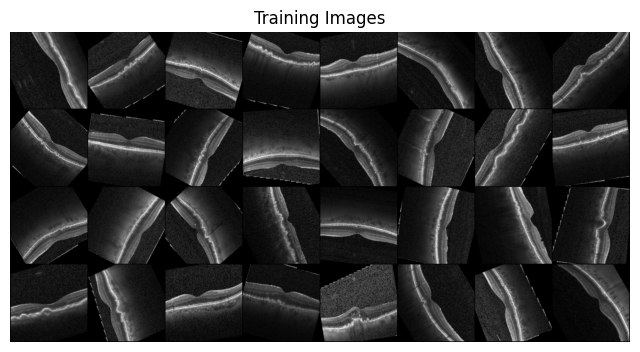

In [ ]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataroot = "/content/OCTUCSD-3class/OCTUCSD-3class/OCT/trainDrusenFix"

dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(num_output_channels=3), # make grayscale image 3 channel
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [ ]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
import math
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu

        num_layers = int(math.log2(image_size)) - 2  # Subtract 2 because we start from 4x4

        layers = []
        in_channels = nz
        out_channels = ngf * 8  # Start with the highest number of feature maps

        # First layer (from latent vector to small feature map)
        layers.append(nn.ConvTranspose2d(in_channels, out_channels, 4, 1, 0, bias=False))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU(True))

        # Middle layers (dynamically determined based on IMAGE_SIZE)
        for _ in range(num_layers):
            in_channels = out_channels
            out_channels = max(out_channels // 2, ngf // 4)  # Reduce features progressively
            layers.append(nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(True))

        # Final layer (output to image with NC channels)
        layers.append(nn.ConvTranspose2d(out_channels, nc, 4, 2, 1, bias=False))
        layers.append(nn.Tanh())

        self.main = nn.Sequential(*layers)

    def forward(self, input):
        return self.main(input)

In [ ]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
           # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(ngf, ngf // 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf // 2),
            nn.ReLU(True),
            # state size. (ngf // 2) x 64 x 64
            nn.ConvTranspose2d(ngf // 2, ngf // 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf // 4),
            nn.ReLU(True),
            # state size. (ngf // 4) x 128 x 128
            nn.ConvTranspose2d(ngf // 4, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 224 x 224
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): BatchNorm2d(

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 224 x 224
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 112 x 112
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),  # Corrected in_channels
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 56 x 56
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 28 x 28
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 14 x 14
            nn.Conv2d(ndf * 8, ndf * 16, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 16),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*16) x 7 x 7
             nn.Conv2d(ndf * 16, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),
            nn.AdaptiveAvgPool2d(1)  # Add adaptive average pooling
        )

    def forward(self, input):
        output = self.main(input)
        return output.view(-1)

In [ ]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (12): BatchNorm2d(1024, eps=1e-05

In [ ]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

Load previous Genarative Models

In [ ]:

netG = Generator(ngpu).to(device)
netG.load_state_dict(torch.load('netG_1st.pth'))
netG.eval()

# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH, weights_only=True))
# model.eval()

<ipython-input-18-e8572cf0466f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  netG.load_state_dict(torch.load('netG_1st.pth'))


Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [ ]:
netD = Discriminator(ngpu).to(device)
netD.load_state_dict(torch.load('netD.pth'))
netD.eval()

Training loop

In [ ]:
from tqdm import tqdm
import time
import datetime
import os
from PIL import Image

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

# Additional tracking variables
best_G_loss = float('inf')
worst_G_loss = float('-inf')
best_D_loss = float('inf')
worst_D_loss = float('-inf')
training_start_time = time.time()

# New tracking variables
D_real_accuracies = []  # Track how well D identifies real images
D_fake_accuracies = []  # Track how well D identifies fake images
G_success_rate = []     # Track how often G fools D
running_D_x_avg = []    # Running average of D(x)
running_D_G_z_avg = []  # Running average of D(G(z))
epoch_times = []        # Track time per epoch
memory_usage = []       # Track GPU memory usage if available

# Check if CUDA is available for GPU memory tracking
if torch.cuda.is_available():
    initial_memory = torch.cuda.memory_allocated()

print("Starting Training Loop...")
print(f"Training started at: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# For each epoch
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_D_x = []          # D(x) values for this epoch
    epoch_D_G_z = []        # D(G(z)) values for this epoch
    epoch_real_correct = 0   # Number of real images correctly identified
    epoch_fake_correct = 0   # Number of fake images correctly identified
    total_batches = 0

    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f'Epoch {epoch}/{num_epochs-1}',leave=True)

    # For each batch in the dataloader
    for i, data in pbar:

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        # Track D's performance on real images
        real_predictions = (output > 0.5).float()
        epoch_real_correct += (real_predictions == label).float().sum().item()
        epoch_D_x.append(D_x)

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Track D's performance on fake images
        fake_predictions = (output > 0.5).float()
        epoch_fake_correct += (fake_predictions == label).float().sum().item()
        epoch_D_G_z.append(D_G_z1)
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        # Track GPU memory if available
        if torch.cuda.is_available():
            memory_usage.append(torch.cuda.memory_allocated() - initial_memory)

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Update best/worst D loss
        current_D_loss = errD.item()
        best_D_loss = min(best_D_loss, current_D_loss)
        worst_D_loss = max(worst_D_loss, current_D_loss)

        # Update best/worst G loss
        current_G_loss = errG.item()
        best_G_loss = min(best_G_loss, current_G_loss)
        worst_G_loss = max(worst_G_loss, current_G_loss)

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1
        total_batches += b_size

    # End of epoch calculations
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    # Calculate epoch statistics
    d_real_accuracy = epoch_real_correct / (total_batches * 2)  # Divide by 2 because of real/fake batches
    d_fake_accuracy = epoch_fake_correct / (total_batches * 2)
    avg_D_x = np.mean(epoch_D_x)
    avg_D_G_z = np.mean(epoch_D_G_z)

    # Store running averages
    D_real_accuracies.append(d_real_accuracy)
    D_fake_accuracies.append(d_fake_accuracy)
    running_D_x_avg.append(avg_D_x)
    running_D_G_z_avg.append(avg_D_G_z)

    # Enhanced epoch logging
    print(f"\nEpoch {epoch} Statistics:")
    print(f"Time: {epoch_time:.2f} seconds")
    print(f"D Loss Range: {best_D_loss:.4f} (best) / {worst_D_loss:.4f} (worst)")
    print(f"G Loss Range: {best_G_loss:.4f} (best) / {worst_G_loss:.4f} (worst)")
    print(f"D Real Accuracy: {d_real_accuracy:.4f}")
    print(f"D Fake Accuracy: {d_fake_accuracy:.4f}")
    print(f"Avg D(x): {avg_D_x:.4f}")
    print(f"Avg D(G(z)): {avg_D_G_z:.4f}")
    if torch.cuda.is_available():
        print(f"GPU Memory Usage: {memory_usage[-1] / 1024**2:.2f} MB")
    print("-" * 80)

# Final training statistics
total_training_time = time.time() - training_start_time
hours = int(total_training_time // 3600)
minutes = int((total_training_time % 3600) // 60)
seconds = int(total_training_time % 60)

print("\nTraining completed!")
print(f"Total training time: {hours:02d}:{minutes:02d}:{seconds:02d}")
print(f"Average epoch time: {np.mean(epoch_times):.2f} seconds")
print("\nDiscriminator Statistics:")
print(f"Best D_loss: {best_D_loss:.4f}")
print(f"Worst D_loss: {worst_D_loss:.4f}")
print(f"Final D Real Accuracy: {D_real_accuracies[-1]:.4f}")
print(f"Final D Fake Accuracy: {D_fake_accuracies[-1]:.4f}")
print(f"Best D Real Accuracy: {max(D_real_accuracies):.4f}")
print(f"Best D Fake Accuracy: {max(D_fake_accuracies):.4f}")

print("\nGenerator Statistics:")
print(f"Best G_loss: {best_G_loss:.4f}")
print(f"Worst G_loss: {worst_G_loss:.4f}")
print(f"Final D(G(z)) Average: {running_D_G_z_avg[-1]:.4f}")
print(f"Best D(G(z)) Average: {max(running_D_G_z_avg):.4f}")

print(f"\nTotal iterations: {iters}")
if torch.cuda.is_available():
    print(f"Peak GPU Memory Usage: {max(memory_usage) / 1024**2:.2f} MB")


torch.save(netG.state_dict(), 'netG.pth')
torch.save(netD.state_dict(), 'netD.pth')

Starting Training Loop...
Training started at: 2025-03-11 13:32:24


Epoch 0/4:   0%|          | 0/270 [00:00<?, ?it/s]

[0/5][0/270]	Loss_D: 1.3245	Loss_G: 3.9707	D(x): 0.4309	D(G(z)): 0.3677 / 0.0786


Epoch 0/4:  19%|█▉        | 51/270 [25:20<1:48:58, 29.85s/it]

[0/5][50/270]	Loss_D: 0.0411	Loss_G: 3.2369	D(x): 0.9999	D(G(z)): 0.0402 / 0.0393


Epoch 0/4:  37%|███▋      | 101/270 [49:38<1:21:24, 28.90s/it]

[0/5][100/270]	Loss_D: 0.0407	Loss_G: 3.3708	D(x): 0.9999	D(G(z)): 0.0397 / 0.0346


Epoch 0/4:  56%|█████▌    | 151/270 [1:13:30<56:59, 28.73s/it]

[0/5][150/270]	Loss_D: 0.0409	Loss_G: 3.2337	D(x): 0.9999	D(G(z)): 0.0399 / 0.0394


Epoch 0/4:  74%|███████▍  | 201/270 [1:37:29<32:57, 28.66s/it]

[0/5][200/270]	Loss_D: 0.0409	Loss_G: 3.2203	D(x): 1.0000	D(G(z)): 0.0400 / 0.0399


Epoch 0/4:  93%|█████████▎| 251/270 [2:01:33<09:17, 29.33s/it]

[0/5][250/270]	Loss_D: 0.0407	Loss_G: 3.2407	D(x): 1.0000	D(G(z)): 0.0399 / 0.0392


Epoch 0/4: 100%|██████████| 270/270 [2:10:17<00:00, 28.95s/it]


Epoch 0 Statistics:
Time: 7817.30 seconds
D Loss Range: 0.0036 (best) / 1.3245 (worst)
G Loss Range: 2.6581 (best) / 15.7768 (worst)
D Real Accuracy: 0.4983
D Fake Accuracy: 0.4998
Avg D(x): 0.9928
Avg D(G(z)): 0.0456
--------------------------------------------------------------------------------



Epoch 1/4:   0%|          | 1/270 [00:31<2:20:43, 31.39s/it]

[1/5][0/270]	Loss_D: 0.0407	Loss_G: 3.2657	D(x): 1.0000	D(G(z)): 0.0399 / 0.0382


Epoch 1/4:  19%|█▉        | 51/270 [24:48<1:46:20, 29.13s/it]

[1/5][50/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 1/4:  37%|███▋      | 101/270 [48:54<1:21:56, 29.09s/it]

[1/5][100/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 1/4:  56%|█████▌    | 151/270 [1:13:08<58:30, 29.50s/it]

[1/5][150/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 1/4:  74%|███████▍  | 201/270 [1:37:32<33:25, 29.06s/it]

[1/5][200/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 1/4:  93%|█████████▎| 251/270 [2:01:46<09:09, 28.93s/it]

[1/5][250/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 1/4: 100%|██████████| 270/270 [2:10:32<00:00, 29.01s/it]


Epoch 1 Statistics:
Time: 7833.09 seconds
D Loss Range: 0.0036 (best) / 1.3245 (worst)
G Loss Range: 1.5969 (best) / 15.7768 (worst)
D Real Accuracy: 0.4997
D Fake Accuracy: 0.5000
Avg D(x): 0.9973
Avg D(G(z)): 0.0810
--------------------------------------------------------------------------------



Epoch 2/4:   0%|          | 1/270 [00:30<2:16:23, 30.42s/it]

[2/5][0/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 2/4:  19%|█▉        | 51/270 [24:47<1:46:00, 29.04s/it]

[2/5][50/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 2/4:  37%|███▋      | 101/270 [48:59<1:21:58, 29.10s/it]

[2/5][100/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 2/4:  56%|█████▌    | 151/270 [1:13:21<58:24, 29.45s/it]

[2/5][150/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 2/4:  74%|███████▍  | 201/270 [1:37:50<33:48, 29.40s/it]

[2/5][200/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 2/4:  93%|█████████▎| 251/270 [2:02:16<09:19, 29.44s/it]

[2/5][250/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 2/4: 100%|██████████| 270/270 [2:11:08<00:00, 29.14s/it]


Epoch 2 Statistics:
Time: 7868.99 seconds
D Loss Range: 0.0036 (best) / 1.3245 (worst)
G Loss Range: 1.5969 (best) / 15.7768 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.0800
--------------------------------------------------------------------------------



Epoch 3/4:   0%|          | 1/270 [00:32<2:27:04, 32.80s/it]

[3/5][0/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 3/4:  19%|█▉        | 51/270 [25:17<1:48:25, 29.70s/it]

[3/5][50/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 3/4:  37%|███▋      | 101/270 [49:55<1:23:09, 29.52s/it]

[3/5][100/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 3/4:  56%|█████▌    | 151/270 [1:14:21<58:02, 29.26s/it]

[3/5][150/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 3/4:  74%|███████▍  | 201/270 [1:38:30<33:05, 28.78s/it]

[3/5][200/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 3/4:  93%|█████████▎| 251/270 [2:02:35<09:10, 28.99s/it]

[3/5][250/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 3/4: 100%|██████████| 270/270 [2:11:25<00:00, 29.20s/it]


Epoch 3 Statistics:
Time: 7885.20 seconds
D Loss Range: 0.0036 (best) / 1.3245 (worst)
G Loss Range: 1.5969 (best) / 15.7768 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.0800
--------------------------------------------------------------------------------



Epoch 4/4:   0%|          | 1/270 [00:31<2:19:21, 31.08s/it]

[4/5][0/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 4/4:  19%|█▉        | 51/270 [24:46<1:50:24, 30.25s/it]

[4/5][50/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 4/4:  37%|███▋      | 101/270 [48:55<1:21:36, 28.97s/it]

[4/5][100/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 4/4:  56%|█████▌    | 151/270 [1:13:19<57:51, 29.17s/it]

[4/5][150/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 4/4:  74%|███████▍  | 201/270 [1:37:58<34:34, 30.07s/it]

[4/5][200/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 4/4:  93%|█████████▎| 251/270 [2:02:19<09:13, 29.16s/it]

[4/5][250/270]	Loss_D: 0.0834	Loss_G: 2.5257	D(x): 1.0000	D(G(z)): 0.0800 / 0.0800


Epoch 4/4: 100%|██████████| 270/270 [2:11:10<00:00, 29.15s/it]



Epoch 4 Statistics:
Time: 7871.04 seconds
D Loss Range: 0.0036 (best) / 1.3245 (worst)
G Loss Range: 1.5969 (best) / 15.7768 (worst)
D Real Accuracy: 0.5000
D Fake Accuracy: 0.5000
Avg D(x): 1.0000
Avg D(G(z)): 0.0800
--------------------------------------------------------------------------------

Training completed!
Total training time: 10:54:35
Average epoch time: 7855.12 seconds

Discriminator Statistics:
Best D_loss: 0.0036
Worst D_loss: 1.3245
Final D Real Accuracy: 0.5000
Final D Fake Accuracy: 0.5000
Best D Real Accuracy: 0.5000
Best D Fake Accuracy: 0.5000

Generator Statistics:
Best G_loss: 1.5969
Worst G_loss: 15.7768
Final D(G(z)) Average: 0.0800
Best D(G(z)) Average: 0.0810

Total iterations: 1350


In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

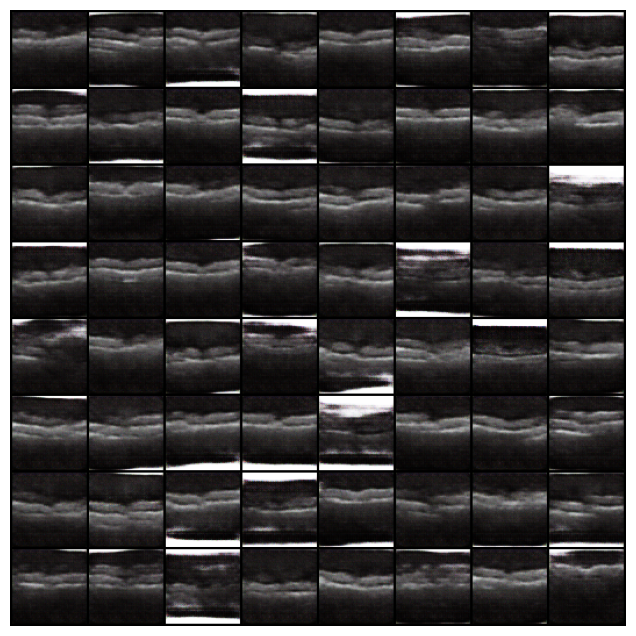

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())
ani.save('animation.gif', writer='imagemagick')

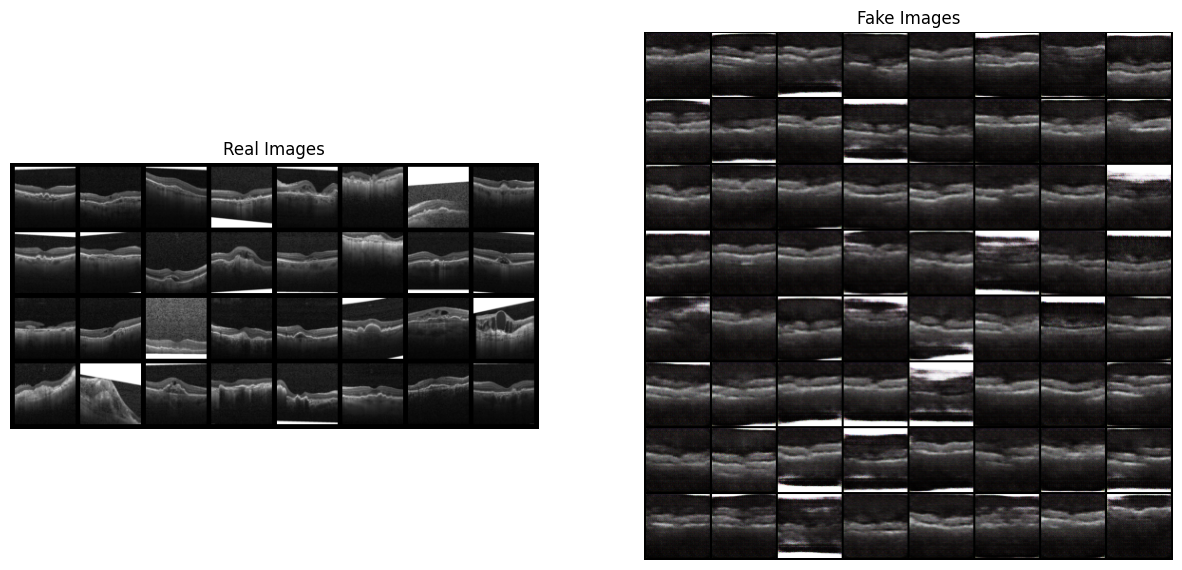

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [ ]:
# Directory to save images
save_dir = "fake_images"
os.makedirs(save_dir, exist_ok=True)

# Save each image separately
for i, img in enumerate(img_list):  # Assuming img_list contains PyTorch tensors
    img = img.detach().cpu().numpy()  # Convert tensor to NumPy array
    img = np.transpose(img, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    img = (img * 255).clip(0, 255).astype(np.uint8)  # Scale to 0-255 and ensure valid range
    img = Image.fromarray(img)
    img.save(f"{save_dir}/fake_image_{i}.png")

print(f"Saved {len(img_list)} images in '{save_dir}' directory.")



Saved 13 images in 'fake_images' directory.


In [ ]:
import shutil

folder_path = "fake_images"  # Change this to your folder name
zip_filename = "fake_images.zip"

# Create a zip file
shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', folder_path)

print(f"Zipped folder saved as {zip_filename}")


Zipped folder saved as fake_images.zip
